# Combination Sampling Using SMOTEENN



In [1]:
# Import Dependencies
import pandas as pd
from path import Path
from collections import Counter


In [2]:
# create DataFrame
data = Path('../Resources/cc_default.csv')
df = pd.read_csv(data)
df.head()

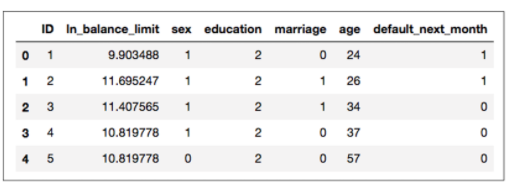

Again, the ID and default_next_month columns are filtered to create the features dataset. The default_next_month column is defined as the target dataset.

In [3]:
# filter ID and default_next_month columns to creaet the feature dataset.
x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

In [4]:
x_cols

['ln_balance_limit', 'sex', 'education', 'marriage', 'age']

In [5]:
Counter(y)

Counter({1: 6636, 0: 23364})

The dataset is split into training and testing sets.

In [6]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Combination Sampling with SMOTEENN
Next, we import the SMOTEENN module and create an instance of SMOTEENN, which resamples the dataset.

In [7]:
# Use the SMOTEENN technique to perform combination sampling on the data
# Count the resampled classes
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Using TensorFlow backend.


Counter({0: 10151, 1: 7674})

# Logistic Regression

In [8]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Confusion Matrix

In [9]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4173, 1659],
       [ 876,  792]])

# Balanced Accuracy Score

In [10]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.5951775616543802

# Classification Report

In [11]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.72      0.47      0.77      0.58      0.35      5832
          1       0.32      0.47      0.72      0.38      0.58      0.33      1668

avg / total       0.71      0.66      0.53      0.68      0.58      0.34      7500

